## A Simple Graph - No LLM

In [28]:
from dotenv import load_dotenv
from langgraph.graph import START, END, StateGraph
from typing import TypedDict, Literal
import random
from IPython.display import display, Image

In [29]:
class AgentState(TypedDict):
    message: str

In [30]:
def node_greet(state: AgentState) -> AgentState:
    state["message"] = state["message"] + " I am"
    return state

In [31]:
def node_happy(state: AgentState) -> AgentState:
    state["message"] = state["message"] + " happy!"
    return state

In [32]:
def node_sad(state: AgentState) -> AgentState:
    state["message"] = state["message"] + " sad!"
    return state

In [33]:
random.random()

0.5947638121814381

In [34]:
def decide_mood(state:AgentState) -> Literal["node_happy", "node_sad"]:
    rand_num = random.random()
    if rand_num < 0.5:
        return "node_happy"
    else:
        return "node_sad"

In [35]:
graph = StateGraph(AgentState)
#graph.add_node("node_greet", node_greet)
graph.add_node("node_happy", node_happy)
graph.add_node("node_sad", node_sad)

graph.add_conditional_edges(START,
                            decide_mood,
                            {
                                "node_happy": "node_happy",
                                "node_sad": "node_sad"
                            })
graph.add_edge("node_happy", END)
graph.add_edge("node_sad", END)
app = graph.compile()

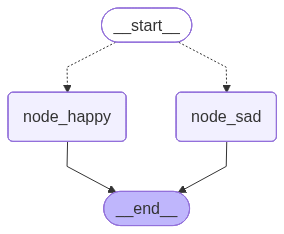

In [36]:
display(Image(app.get_graph().draw_mermaid_png()))

In [43]:
app.invoke({"message": "Hi, this is Snehotosh"})

{'message': 'Hi, this is Snehotosh happy!'}